In [10]:
import csv
import numpy as np
def load_bands(file):
    def condenser(x):
        rv = x
        while '  ' in rv:
            rv = rv.replace('  ', ' ')
        return rv.strip()
    rv = []
    with open(file, "r", newline='') as f:
        rdr = csv.reader(map(condenser,f),delimiter=' ')
        rvgrp = []
        for r in rdr:
            if len(r) == 0:
                rv.append(rvgrp)
                rvgrp = []
                # think about adding warnings if this is zero length
            else:
                # think about handling exceptions if non-numeric
                rvgrp.append([float(r[0]),float(r[1])])
    rv = np.array(rv)
    return rv

In [13]:
data = load_bands("bands.out.gnu.txt")
print(data)

[[[  0.     -20.1852]
  [  0.05   -20.1827]
  [  0.1    -20.1755]
  ...
  [  2.5588 -19.9748]
  [  2.6454 -19.9711]
  [  2.7321 -19.9687]]

 [[  0.     -20.1852]
  [  0.05   -20.1827]
  [  0.1    -20.1755]
  ...
  [  2.5588 -19.9748]
  [  2.6454 -19.9711]
  [  2.7321 -19.9687]]

 [[  0.     -19.9328]
  [  0.05   -19.9355]
  [  0.1    -19.9434]
  ...
  [  2.5588 -19.9388]
  [  2.6454 -19.9259]
  [  2.7321 -19.9226]]

 ...

 [[  0.      12.1043]
  [  0.05    12.148 ]
  [  0.1     12.2677]
  ...
  [  2.5588  12.6232]
  [  2.6454  12.4136]
  [  2.7321  12.3525]]

 [[  0.      14.2098]
  [  0.05    14.2135]
  [  0.1     14.226 ]
  ...
  [  2.5588  14.1964]
  [  2.6454  14.2612]
  [  2.7321  14.2723]]

 [[  0.      14.2098]
  [  0.05    14.2135]
  [  0.1     14.226 ]
  ...
  [  2.5588  14.1964]
  [  2.6454  14.2612]
  [  2.7321  14.2723]]]


<IPython.core.display.Javascript object>


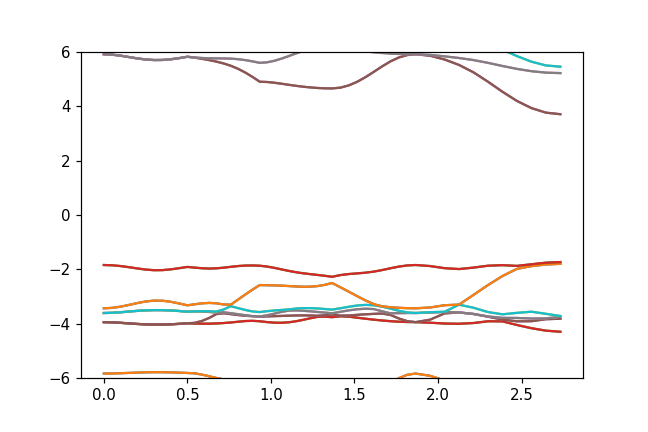

(-6, 6)

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
for i in range(0,len(data)):
    plt.plot(data[i][:,0],data[i][:,1])
plt.ylim([-6,6])

In [31]:
import logging
def merge_bands(arr):
    merged = None
    for ds in arr:
        if merged is None:
            merged = ds
        else:
            nds = ds
            if (ds.shape[0] != merged.shape[0]) or np.any(merged[:,0] != ds[:,0]):
                logging.warning("Incomplete data found.")
                nds = np.interp(merged[:,0].ds[:,0],ds[:,1])
            merged = np.hstack((merged, ds[:,1].reshape((merged.shape[0],1))))
    return merged

In [32]:
print(merge_bands(data))

[[  0.     -20.1852 -20.1852 ...  12.1043  14.2098  14.2098]
 [  0.05   -20.1827 -20.1827 ...  12.148   14.2135  14.2135]
 [  0.1    -20.1755 -20.1755 ...  12.2677  14.226   14.226 ]
 ...
 [  2.5588 -19.9748 -19.9748 ...  12.6232  14.1964  14.1964]
 [  2.6454 -19.9711 -19.9711 ...  12.4136  14.2612  14.2612]
 [  2.7321 -19.9687 -19.9687 ...  12.3525  14.2723  14.2723]]


In [27]:
with open("output.csv","w",newline='') as f:
    wrt = csv.writer(f)
    for r in merged:
#        print(r)
        wrt.writerow(r)

In [33]:
import xylib
xylib.xylib_get_version()

'1.5.0'

In [44]:
def load_raw(file):
    rv = {}
    f = xylib.load_file(file,"")
    meta = {}
    for i in range(f.meta.size()):
        key = f.meta.get_key(i)
        value = f.meta.get(key)
        meta[key] = value
    rv['meta'] = meta
    for i in range(0,f.get_block_count()):
        block = f.get_block(i)
        ncol = block.get_column_count()
        # column 0 is pseudo-column with point indices, we skip it
        nrow = block.get_point_count()
        data = []
        for j in range(nrow):
            values = [block.get_column(k).get_value(j)
                    for k in range(1, ncol+1)]
            data.append(values)
        rv[i] = np.array(data)
    return rv

In [45]:
raw = load_raw("NN_StartingMaterials_Ba(NO3)2.raw")

In [46]:
print(raw)

{'meta': {'ALPHA1': '1.5406', 'ALPHA2': '1.54439', 'ALPHA_AVERAGE': '1.54184', 'ALPHA_RATIO': '0.5', 'ANODE_MATERIAL': 'Cu', 'BETA': '1.39222', 'COMMENT': '', 'MEASURE_DATE': '08/30/19', 'MEASURE_TIME': '10:25:14', 'SAMPLE_ID': 'NN_StartingMaterials_Ba(NO3)2', 'SITE': 'USA', 'USER': 'Administrator', 'file status': 'done', 'format version': '3', 'measurement time': '0'}, 0: array([[ 5.       , 37.       ],
       [ 5.0185858, 31.       ],
       [ 5.0371716, 39.       ],
       ...,
       [59.9953822,  8.       ],
       [60.013968 ,  8.       ],
       [60.0325538,  7.       ]])}


<IPython.core.display.Javascript object>


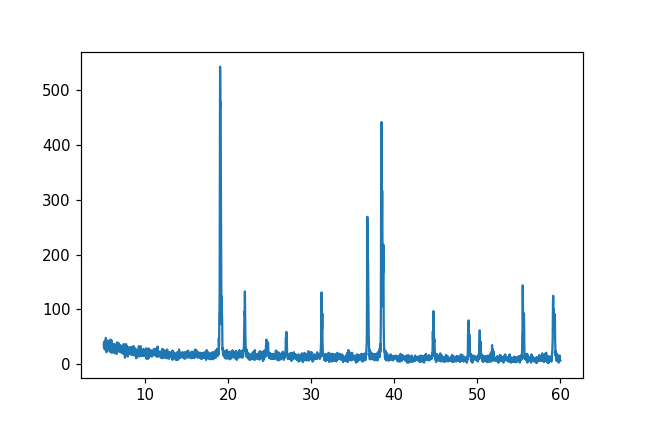

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(raw[0][:,0],raw[0][:,1])